<a href="https://colab.research.google.com/github/jaasielmark12/AIML-TASK-3/blob/main/Netflix_Movies_and_TV_Shows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
plt.style.use('default')
sns.set()


In [3]:
# Load dataset
df = pd.read_csv("/content/netflix_movies_detailed_up_to_2025.csv")

# Preview dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,language,description,popularity,vote_count,vote_average,budget,revenue
0,10192,Movie,Shrek Forever After,Mike Mitchell,"Mike Myers, Eddie Murphy, Cameron Diaz, Antoni...",United States of America,2010-05-16,2010,6.380,NaN,"Comedy, Adventure, Fantasy, Animation, Family",en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.380,165000000,752600867
1,27205,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W...","United Kingdom, United States of America",2010-07-15,2010,8.369,NaN,"Action, Science Fiction, Adventure",en,"Cobb, a skilled thief who commits corporate es...",156.242,37119,8.369,160000000,839030630
2,12444,Movie,Harry Potter and the Deathly Hallows: Part 1,David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, T...","United Kingdom, United States of America",2010-11-17,2010,7.744,NaN,"Adventure, Fantasy",en,"Harry, Ron and Hermione walk away from their l...",121.191,19327,7.744,250000000,954305868
3,38757,Movie,Tangled,"Byron Howard, Nathan Greno","Mandy Moore, Zachary Levi, Donna Murphy, Ron P...",United States of America,2010-11-24,2010,7.600,NaN,"Animation, Family, Adventure",en,"Feisty teenager Rapunzel, who has long and mag...",111.762,11638,7.600,260000000,592461732
4,10191,Movie,How to Train Your Dragon,"Chris Sanders, Dean DeBlois","Jay Baruchel, Gerard Butler, Craig Ferguson, A...",United States of America,2010-03-18,2010,7.800,NaN,"Fantasy, Adventure, Animation, Family",en,As the son of a Viking leader on the cusp of m...,110.044,13259,7.800,165000000,494879471


In [4]:
# Dataset info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       16000 non-null  int64  
 1   type          16000 non-null  object 
 2   title         16000 non-null  object 
 3   director      15868 non-null  object 
 4   cast          15796 non-null  object 
 5   country       15534 non-null  object 
 6   date_added    16000 non-null  object 
 7   release_year  16000 non-null  int64  
 8   rating        16000 non-null  float64
 9   duration      0 non-null      float64
 10  genres        15893 non-null  object 
 11  language      16000 non-null  object 
 12  description   15868 non-null  object 
 13  popularity    16000 non-null  float64
 14  vote_count    16000 non-null  int64  
 15  vote_average  16000 non-null  float64
 16  budget        16000 non-null  int64  
 17  revenue       16000 non-null  int64  
dtypes: float64(4), int64(5), o

In [5]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

numerical_features, categorical_features


(Index(['show_id', 'release_year', 'rating', 'duration', 'popularity',
        'vote_count', 'vote_average', 'budget', 'revenue'],
       dtype='object'),
 Index(['type', 'title', 'director', 'cast', 'country', 'date_added', 'genres',
        'language', 'description'],
       dtype='object'))

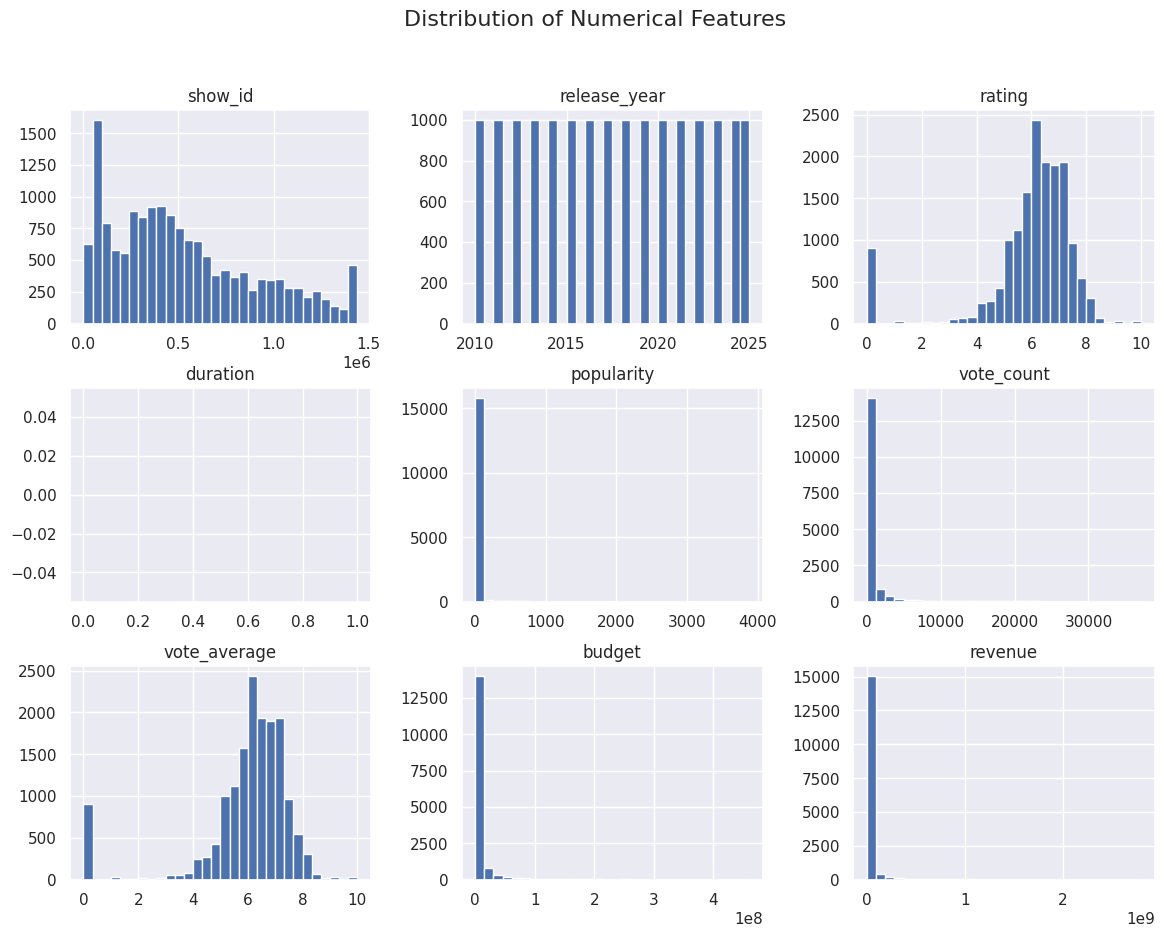

In [6]:
df[numerical_features].hist(
    figsize=(14, 10),
    bins=30
)
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()


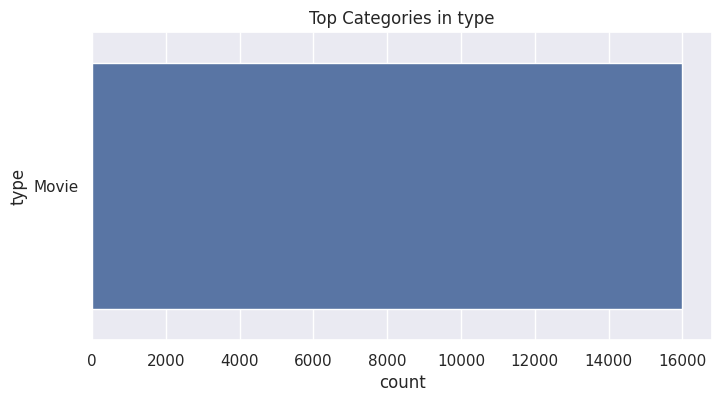

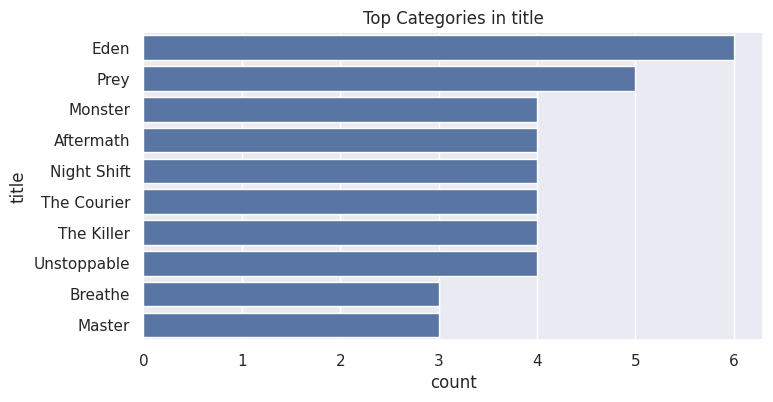

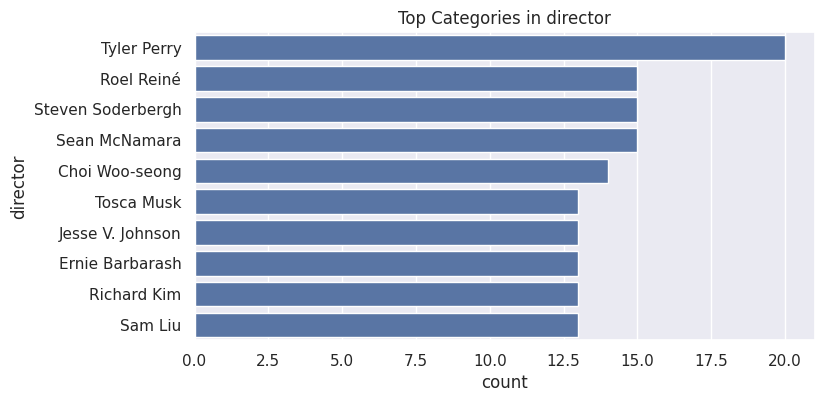

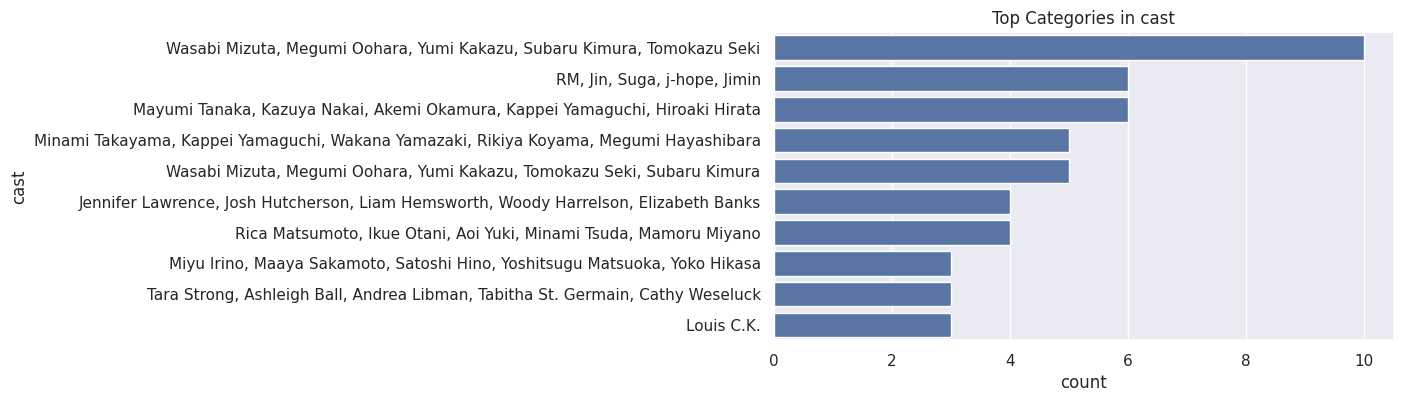

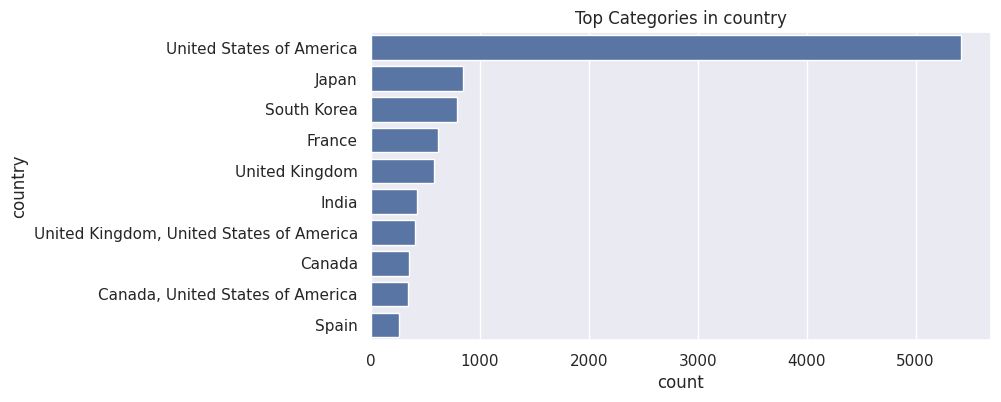

In [7]:
for col in categorical_features[:5]:
    plt.figure(figsize=(8,4))
    sns.countplot(
        y=df[col],
        order=df[col].value_counts().head(10).index
    )
    plt.title(f"Top Categories in {col}")
    plt.show()


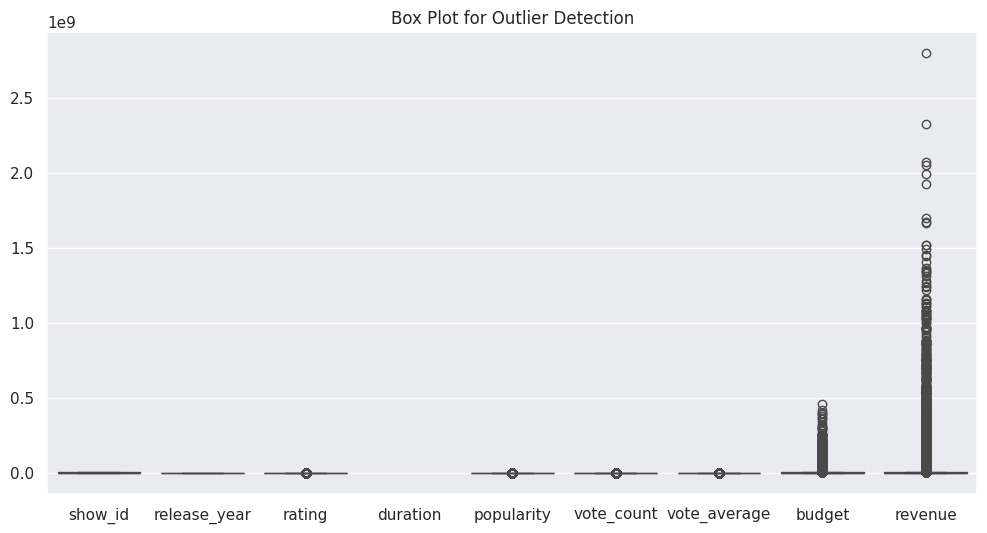

In [8]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[numerical_features])
plt.title("Box Plot for Outlier Detection")
plt.show()


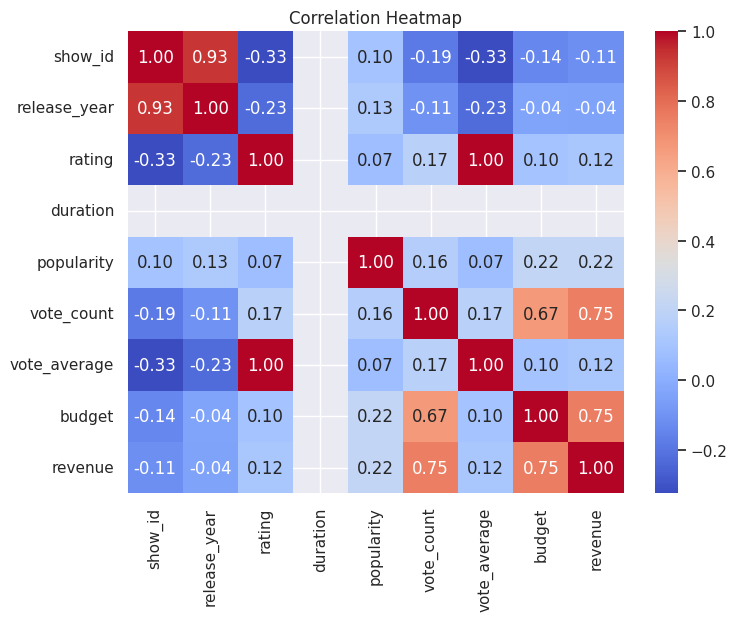

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(
    df[numerical_features].corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation Heatmap")
plt.show()


In [11]:
df[numerical_features].corr()['vote_average'].sort_values(ascending=False)

,vote_average
rating,1.000000
vote_average,1.000000
vote_count,0.173600
revenue,0.117231
budget,0.096967
popularity,0.071178
release_year,-0.230341
show_id,-0.325255
duration,NaN
